The reason Im using Jupyter notebook is its ability to execute a separate cell with code, which is great for plotting and exploration. Moreover, you can see all results without executing this code.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 21, 12
pd.set_option('display.max_columns', 100)


from sklearn.preprocessing import StandardScaler


codec1 = pd.read_csv('assignment/codec1.csv')
codec2 = pd.read_csv('assignment/codec2.csv')

In [105]:
print(codec1.info())
print(codec2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 21 columns):
Type               1654 non-null object
Sample             1654 non-null object
Frame Size         1654 non-null object
Chroma             1654 non-null int64
Bitrate            1654 non-null object
Frames             1654 non-null int64
PSNR(Y)            1654 non-null float64
PSNR(U)            1654 non-null float64
PSNR(V)            1654 non-null float64
PSNR(YUV)          1654 non-null float64
SSIM(Y,dB)         1654 non-null float64
SSIM(U,dB)         1654 non-null float64
SSIM(V,dB)         1654 non-null float64
SSIM(YUV,dB)       1654 non-null float64
Streams            1654 non-null float64
FPS                1654 non-null float64
GPU_Power          1654 non-null float64
CPU_Power          1654 non-null float64
System_Power       1654 non-null float64
CPU_Utilization    1654 non-null object
Encoded_Bitrate    1654 non-null float64
dtypes: float64(14), int64(2), object(5)


We got 16 columns with numerical data and 5 with objects/strings. Let's see their statistical properties

In [123]:
codec1.head(5)

,Type,Sample,Frame Size,Chroma,Bitrate,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,CPU_Utilization,Encoded_Bitrate
0,g1,s1,720p,420,2.5M,1115,40.5274,41.9166,43.4468,40.8863,15.9581,14.9193,16.5194,15.6639,8.0,136.96,44.14,90.68,482.85,5.02%,4.8157
1,g1,s1,720p,420,4M,1115,42.8432,42.5889,45.5759,42.8283,17.4999,16.0209,17.2664,16.9304,8.0,136.96,44.14,90.68,482.85,5.02%,5.8394
2,g1,s1,720p,420,7M,1115,44.1589,45.1370,46.8860,43.3528,18.3117,16.4002,19.0651,18.0556,8.0,136.96,44.14,90.68,482.85,5.02%,7.9673
3,g1,s1,720p,420,8M,1115,44.3245,44.0865,46.3346,44.4020,19.0287,16.8198,19.4464,19.0370,8.0,136.96,44.14,90.68,482.85,5.02%,8.9300
4,g1,s2,1080p,420,4M,1115,41.3563,41.4397,44.1169,41.3965,16.2267,14.6692,17.0141,15.3173,8.0,70.96,45.51,91.18,498.14,5.05%,5.9301


In [124]:
codec2.head(5)

,Type,Sample,Frame Size,Chroma,Bitrate,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,CPU_Utilization,Encoded_Bitrate
0,g1,s1,720p,420,2.5M,1115,40.8659,42.0848,42.8240,40.4885,14.9675,13.2118,10.1198,16.5031,16.0,76.71,38.41,93.01,235.04,2.80%,4.6987
1,g1,s1,720p,420,4M,1115,42.4250,43.2559,45.6573,42.6508,17.5430,14.3138,11.4217,16.9372,16.0,76.71,38.41,93.01,235.04,2.80%,5.7351
2,g1,s1,720p,420,7M,1115,43.9433,44.1358,45.7090,43.4080,18.5246,14.9851,12.2161,17.3444,16.0,76.71,38.41,93.01,235.04,2.80%,7.8806
3,g1,s1,720p,420,8M,1115,44.8791,45.1872,46.6482,45.3303,19.6822,16.3384,11.9644,18.5666,16.0,76.71,38.41,93.01,235.04,2.80%,8.8988
4,g1,s2,1080p,420,4M,1115,41.6116,42.1998,42.9931,40.7083,16.0146,13.2161,10.9997,14.7003,16.0,36.71,38.09,92.21,232.25,1.30%,5.8428


In [2]:
codec1.describe()

,Chroma,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,Encoded_Bitrate
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1650.000000,1654.000000,1646.000000,1654.000000
mean,424.498186,1074.787183,39.873573,43.217781,43.635860,40.792728,14.847359,15.417085,15.692246,14.896699,8.793229,74.993253,43.457018,90.583652,462.573609,9.291270
std,9.368877,1020.806363,5.433826,4.170283,4.023437,5.020327,4.206852,3.579125,3.493057,3.764532,2.391668,39.866250,1.488449,2.700566,19.561874,4.331969
min,420.000000,206.000000,22.347100,29.567100,29.776400,24.005100,3.042100,4.384700,5.746400,3.995600,8.000000,12.960000,33.320000,81.880000,388.330000,3.638000
25%,420.000000,415.000000,36.286775,40.457525,41.162350,37.426100,11.941700,13.124550,13.407550,12.240850,8.000000,48.460000,42.630000,89.110000,449.980000,5.848200
50%,420.000000,685.000000,40.006600,43.317350,43.473150,40.915000,14.978100,15.339600,15.530450,14.855950,8.000000,65.960000,43.490000,90.540000,466.330000,8.091500
75%,420.000000,1115.000000,43.579750,45.865875,46.259675,44.243650,17.729425,17.536000,17.866175,17.345325,8.000000,114.960000,44.290000,91.740000,476.500000,11.203525
max,444.000000,4689.000000,54.225600,57.404000,59.364300,55.862400,28.649700,30.570600,30.642600,28.345800,16.000000,149.960000,47.680000,102.710000,508.850000,25.073600


In [3]:
codec2.describe()

,Chroma,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,Encoded_Bitrate
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1650.000000,1654.000000
mean,424.498186,1074.787183,39.933846,43.071235,43.510141,40.726606,14.496417,14.813790,11.766158,14.409333,15.042322,46.048573,38.378912,92.507110,226.620073,9.246249
std,9.368877,1020.806363,5.788910,4.709323,4.581589,5.407828,4.294184,3.700670,3.854124,3.824738,2.597760,32.440241,1.082353,3.287554,10.084672,4.355243
min,420.000000,206.000000,-1.750825,-0.469683,-1.768174,-1.957731,-1.425352,-1.870864,-5.737500,-1.507658,8.000000,6.710000,36.130000,76.070000,163.440000,3.646100
25%,420.000000,415.000000,36.328400,40.398800,40.970200,37.529675,11.578525,12.519900,9.369025,11.906550,16.000000,25.710000,37.620000,91.540000,222.500000,5.769175
50%,420.000000,685.000000,40.079400,43.313550,43.510700,40.893700,14.693050,14.810650,11.760700,14.361800,16.000000,36.710000,38.140000,92.610000,227.480000,8.056800
75%,420.000000,1115.000000,43.761400,45.702300,46.285100,44.156775,17.363750,16.948325,14.121500,16.928425,16.000000,59.710000,39.040000,93.970000,232.440000,11.160875
max,444.000000,4689.000000,55.042400,57.475500,58.323000,55.686300,29.119300,30.976300,27.195700,28.157400,16.000000,187.710000,41.830000,103.710000,250.750000,25.231600


In [25]:
codec1.describe(include=['object'])

,Type,Sample,Frame Size,Bitrate,CPU_Utilization
count,1654,1654,1654,1654,1654
unique,6,414,3,9,211
top,g1,s137,720p,4M,4.58%
freq,1156,4,744,357,32


In [26]:
codec2.describe(include=['object'])

,Type,Sample,Frame Size,Bitrate,CPU_Utilization
count,1654,1654,1654,1654,1654
unique,6,414,3,9,227
top,g1,s137,720p,4M,0.45%
freq,1156,4,744,357,28


First of all, there are 12 instances with missing system and gpu power values in Codec1 dataset and 4 instances with missing system power values in Codec2 dataset.
Secondly, I see clear difference in the number of encoding streams used, FPS, and System Power, I'll return to this statements a little bit later.
Also, there is something going on with metrics in Codec2 dataset, I will try to find the reason why its minimum values is negative.

In [112]:
codec1_na_free = codec1.dropna()
print(codec1_na_free.shape)
codec2_na_free = codec2.dropna()
print(codec2_na_free.shape)

(1642, 21)
(1650, 21)


There are a couple of things we can do with instances with missing values: drop them or fill them. For now I will fill them using linear interpolation which might not be the optimal approach in the long run, considering grouped structure of the data and the fact that power values are the same within sample.

In [113]:
codec1_only_na = codec1[~codec1.index.isin(codec1_na_free.index)]
codec1_only_na

,Type,Sample,Frame Size,Chroma,Bitrate,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,CPU_Utilization,Encoded_Bitrate
220,g1,s56,720p,420,2.5M,246,45.8257,46.7411,46.6823,46.4389,21.0067,18.6288,18.5603,20.2604,8.0,100.96,46.02,91.08,NaN,4.95%,4.5498
221,g1,s56,720p,420,4M,246,47.9998,47.7321,47.9358,47.4759,22.6585,19.1697,19.8993,21.3427,8.0,100.96,46.02,91.08,NaN,4.95%,5.5199
222,g1,s56,720p,420,7M,246,49.4491,48.0165,48.9731,49.3343,24.1726,20.3199,20.8584,22.6995,8.0,100.96,46.02,91.08,NaN,4.95%,7.3599
223,g1,s56,720p,420,8M,246,49.0469,48.3501,49.0999,49.8107,24.5838,20.9382,20.8818,23.4002,8.0,100.96,46.02,91.08,NaN,4.95%,8.1826
224,g1,s57,720p,444,2.5M,246,43.7851,43.3168,44.2636,44.4634,20.4109,15.7309,15.8346,16.8663,8.0,77.96,NaN,88.98,429.33,3.60%,4.7050
225,g1,s57,720p,444,4M,246,46.9779,44.6515,44.8058,44.5007,22.5121,16.0937,16.8443,17.4859,8.0,77.96,NaN,88.98,429.33,3.60%,5.6992
226,g1,s57,720p,444,7M,246,47.6659,45.6508,46.4828,47.6541,23.5165,17.5321,17.8837,19.5410,8.0,77.96,NaN,88.98,429.33,3.60%,7.7324
227,g1,s57,720p,444,8M,246,49.3578,46.7574,46.5952,48.0565,24.1897,18.3531,18.4808,19.1329,8.0,77.96,NaN,88.98,429.33,3.60%,8.7626
272,g1,s69,1080p,420,4M,206,42.2360,44.3660,43.4563,43.6655,15.6454,16.5232,15.7481,16.0782,8.0,38.96,41.04,90.68,NaN,3.28%,6.1665
273,g1,s69,1080p,420,7M,206,44.8918,44.8595,44.8216,44.1318,16.5881,16.8590,16.1536,17.2197,8.0,38.96,41.04,90.68,NaN,3.28%,8.4224


In [36]:
codec2_only_na = codec2[~codec2.index.isin(codec2_na_free.index)]
codec2_only_na

,Type,Sample,Frame Size,Chroma,Bitrate,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,CPU_Utilization,Encoded_Bitrate
220,g1,s56,720p,420,2.5M,246,45.3989,46.0391,46.9277,47.4568,22.2118,18.1259,13.5675,20.0633,16.0,52.71,36.56,95.01,NaN,2.26%,4.7081
221,g1,s56,720p,420,4M,246,48.4780,47.4362,47.7654,47.5372,22.7329,19.3256,16.2349,21.1605,16.0,52.71,36.56,95.01,NaN,2.26%,5.8662
222,g1,s56,720p,420,7M,246,50.5089,49.4048,49.1524,48.8428,23.1995,20.4791,16.6075,21.7728,16.0,52.71,36.56,95.01,NaN,2.26%,7.8892
223,g1,s56,720p,420,8M,246,51.0008,48.3648,50.1640,49.7596,24.0483,20.7929,17.0721,21.6871,16.0,52.71,36.56,95.01,NaN,2.26%,8.5788


In [4]:
codec1.interpolate(inplace=True)#.iloc[265:275] #467.466, 457.932, 448.398, 438.864
codec2.interpolate(inplace=True)

In [106]:
#codec1[codec1['Type'] == 'g2'].head(50)
codec1.head(10)

,Type,Sample,Frame Size,Chroma,Bitrate,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,CPU_Utilization,Encoded_Bitrate
0,g1,s1,720p,420,2.5M,1115,40.5274,41.9166,43.4468,40.8863,15.9581,14.9193,16.5194,15.6639,8.0,136.96,44.14,90.68,482.85,5.02%,4.8157
1,g1,s1,720p,420,4M,1115,42.8432,42.5889,45.5759,42.8283,17.4999,16.0209,17.2664,16.9304,8.0,136.96,44.14,90.68,482.85,5.02%,5.8394
2,g1,s1,720p,420,7M,1115,44.1589,45.1370,46.8860,43.3528,18.3117,16.4002,19.0651,18.0556,8.0,136.96,44.14,90.68,482.85,5.02%,7.9673
3,g1,s1,720p,420,8M,1115,44.3245,44.0865,46.3346,44.4020,19.0287,16.8198,19.4464,19.0370,8.0,136.96,44.14,90.68,482.85,5.02%,8.9300
4,g1,s2,1080p,420,4M,1115,41.3563,41.4397,44.1169,41.3965,16.2267,14.6692,17.0141,15.3173,8.0,70.96,45.51,91.18,498.14,5.05%,5.9301
5,g1,s2,1080p,420,7M,1115,42.9543,42.8183,45.8290,42.7555,17.0168,14.7583,17.9333,16.6916,8.0,70.96,45.51,91.18,498.14,5.05%,8.0196
6,g1,s2,1080p,420,10M,1115,43.1505,44.1960,45.5982,45.0735,18.6705,15.6604,18.5648,17.7611,8.0,70.96,45.51,91.18,498.14,5.05%,11.0913
7,g1,s2,1080p,420,12M,1115,43.9566,44.7007,47.2895,44.3465,18.9171,16.2143,19.4570,18.4747,8.0,70.96,45.51,91.18,498.14,5.05%,13.0404
8,g1,s3,2160p,420,10M,1115,41.2885,42.4371,44.4578,42.7132,16.1589,15.2440,18.6537,16.4859,8.0,21.96,46.69,87.11,505.31,4.62%,11.3021
9,g1,s3,2160p,420,15M,1115,42.9893,43.5135,46.2616,43.3434,17.3605,15.2355,18.5346,17.2081,8.0,21.96,46.69,87.11,505.31,4.62%,15.4394


In [30]:
codec2.head()

,Type,Sample,Frame Size,Chroma,Bitrate,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,CPU_Utilization,Encoded_Bitrate
0,g1,s1,720p,420,2.5M,1115,40.8659,42.0848,42.8240,40.4885,14.9675,13.2118,10.1198,16.5031,16.0,76.71,38.41,93.01,235.04,2.80%,4.6987
1,g1,s1,720p,420,4M,1115,42.4250,43.2559,45.6573,42.6508,17.5430,14.3138,11.4217,16.9372,16.0,76.71,38.41,93.01,235.04,2.80%,5.7351
2,g1,s1,720p,420,7M,1115,43.9433,44.1358,45.7090,43.4080,18.5246,14.9851,12.2161,17.3444,16.0,76.71,38.41,93.01,235.04,2.80%,7.8806
3,g1,s1,720p,420,8M,1115,44.8791,45.1872,46.6482,45.3303,19.6822,16.3384,11.9644,18.5666,16.0,76.71,38.41,93.01,235.04,2.80%,8.8988
4,g1,s2,1080p,420,4M,1115,41.6116,42.1998,42.9931,40.7083,16.0146,13.2161,10.9997,14.7003,16.0,36.71,38.09,92.21,232.25,1.30%,5.8428


Its time to talk about negative values of PSNR and SSIM in codec2 dataset. Given that PSNR = 20*log10(MAXi) - 10*log10(MSE), it can take negative value only if MSE is very high, which means that difference between raw and encoded frame pixels is huge. How many frames like that we got?
Looking at range of values of SSIM(it should be bound to [-1;1] interval, which is not the case in this datasets), I assume that some transformation were made so it could be interpreted in dB, like PSNR. I suppose it could look like this: -10 * log10 (1 - SSIM). This transformed value can be negative only if SSIM itself is negative, which in its turn could happen if covariance between windows is negative (some window 'region' in the encoded frame is inverted?). So the small values of this version of SSIM(rather than values of PSNR) should not be considered as a sign of lower quality, its just the way its calculated. Given that the frames are in YUV color scheme, the 20*log10(255) part of PSNR equals 48.13, pixelwise MSE tends to produce small values, as we can see in this table. The mean SSIM(dB) value of ~15 is clearly possible if native SSIM is close to 1, meaning the similarity between raw and encoded frames is high, assuming SSIM(dB) = -10 * log10 (1 - SSIM).

Cut off outliers which lies beyond 3*standard deviations around the mean

In [96]:
metric_columns = [x for x in codec1.columns if 'PSNR' in x or 'SSIM' in x]
codec1_no_outliers = codec1
codec2_no_outliers = codec2
# I want to take a look at outliers so I'll save them too
outliers1 = pd.DataFrame(columns=codec1.columns)
outliers2 = pd.DataFrame(columns=codec2.columns)
# Here I consider only metric features
for metric in metric_columns:
    outliers2 = outliers2.append(codec2_no_outliers[(np.abs(codec2_no_outliers[metric]-codec2_no_outliers[metric].mean()) > (3*codec2_no_outliers[metric].std()))])
    outliers1 = outliers1.append(codec1_no_outliers[(np.abs(codec1_no_outliers[metric]-codec1_no_outliers[metric].mean()) > (3*codec1_no_outliers[metric].std()))])
    codec2_no_outliers = codec2_no_outliers[np.abs(codec2_no_outliers[metric]-codec2_no_outliers[metric].mean()) <= (3*codec2_no_outliers[metric].std())]
    codec1_no_outliers = codec1_no_outliers[np.abs(codec1_no_outliers[metric]-codec1_no_outliers[metric].mean()) <= (3*codec1_no_outliers[metric].std())]
print(codec1_no_outliers.shape)
print(codec2_no_outliers.shape)

outliers1.sort_index(inplace=True)

codec1_no_outliers_only_continuous = codec1_no_outliers.drop(columns=['Type', 'Sample', 'Frame Size', 'Bitrate', 'CPU_Utilization'])
codec2_no_outliers_only_continuous = codec2_no_outliers.drop(columns=['Type', 'Sample', 'Frame Size', 'Bitrate', 'CPU_Utilization'])
difference = codec2_no_outliers_only_continuous - codec1_no_outliers_only_continuous


#print(difference.shape)
#difference.describe()

range_index = pd.RangeIndex(0, len(codec1_no_outliers))
#print(range_index[~range_index.isin(codec1_no_outliers.index)])
print(sorted(outliers1.index))
print(sorted(outliers2.index))

#set1 = set(range_index[~range_index.isin(codec1_no_outliers.index)])
set1 = set(outliers1.index)
set2 = set(outliers2.index)
print(sorted(set1 - set2))

(1633, 21)
(1626, 21)
[200, 202, 203, 680, 1052, 1053, 1054, 1055, 1056, 1058, 1059, 1534, 1535, 1537, 1538, 1539, 1599, 1609, 1616, 1620, 1621]
[196, 200, 201, 1052, 1053, 1054, 1056, 1057, 1224, 1225, 1226, 1227, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1599, 1604, 1608, 1609, 1612, 1616, 1617, 1620, 1621]
[202, 203, 680, 1055, 1058, 1059]


Some of the outlier samples are common for both datasets, but there are also unique ones.
I have an idea of measuring the quality of codecs, here I will make a few assumptions:
Key features for measuring quality are: metric values Metric-bitrate dependance might be a good way to measure quality. It might be 

In [97]:
outliers2.sort_index(inplace=True)
range_index = pd.RangeIndex(0, len(outlierless_codec2))

#set2 = set(range_index[~range_index.isin(outlierless_codec2.index)])

#print(range_index[~range_index.isin(outlierless_codec2.index)])
#outliers2.head(29)
print(sorted(set2 - set1))

[196, 201, 1057, 1224, 1225, 1226, 1227, 1533, 1536, 1604, 1608, 1612, 1617]


In [101]:
indexes_to_drop_in_codec2 = set1 - set2
indexes_to_drop_in_codec1 = set2 - set1
dropped_uncommon_indexes1 = outlierless_codec1.drop(indexes_to_drop_in_codec1)
dropped_uncommon_indexes2 = outlierless_codec2.drop(index=indexes_to_drop_in_codec2)
print(dropped_uncommon_indexes1.shape)
print(dropped_uncommon_indexes2.shape)

(1620, 21)
(1620, 21)


In [118]:
codec1_quality = dropped_uncommon_indexes1[[x for x in dropped_uncommon_indexes1.columns if 'PSNR' in x] + ['Type', 'Bitrate', 'Sample']]
codec2_quality = dropped_uncommon_indexes2[[x for x in dropped_uncommon_indexes2.columns if 'PSNR' in x] + ['Type', 'Bitrate', 'Sample']]
#codec1_quality.info()
#codec1_quality.groupby(['Type', 'Bitrate']).sum().plot()
df1 = codec1_quality.groupby(['Type', 'Bitrate']).mean()#.describe()
df2 = codec2_quality.groupby(['Type', 'Bitrate']).mean()
df1.head()
#diffy = df1 - df2
#diffy.head(50)

#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))


PSNR(Y)    PSNR(U)    PSNR(V)  PSNR(YUV)
Type Bitrate                                            
g1   10M      40.506892  43.196839  43.555458  41.261075
     12M      42.064336  44.256070  44.671008  42.631695
     15M      39.297264  42.335380  42.709561  39.891811
     17M      39.628039  42.697452  43.078984  40.207689
     2.5M     38.412886  41.712771  42.370448  39.331330

In [120]:
plt.figure(figsize=(20, 10))
df1[df1['Type']=='g1'].plot(figsize=(20, 10))
df2[df2['Type']=='g1'].plot(figsize=(20, 10))

KeyError: 'Type'

<Figure size 1440x720 with 0 Axes>

In [ ]:
df2.head(50)

'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>PCA<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'

In [133]:
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
# Scale data to [0;1] before applying PCA
scaler = MinMaxScaler()

codec1_only_continuous = codec1.drop(columns=['Type', 'Sample', 'Frame Size', 'Bitrate', 'CPU_Utilization'])
codec2_only_continuous = codec2.drop(columns=['Type', 'Sample', 'Frame Size', 'Bitrate', 'CPU_Utilization'])
scaled_codec1 = scaler.fit_transform(codec1_only_continuous)
pca = decomposition.PCA(n_components=0.95) # explained variance is 95%
pca.fit(scaled_codec1)
reduced = pca.transform(scaled_codec1)
reduced = pd.DataFrame(reduced)

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [138]:
#This tests whether 2 samples are drawn from the same distribution.Tests 
from scipy import stats
stats.ks_2samp(codec1_only_continuous['SSIM(Y,dB)'], codec2_only_continuous['SSIM(Y,dB)']) 
#we cannot reject the null hypothesis at a 10% or lower alpha since the p-value (0.89) is higher than 10%
#If the KS statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

Ks_2sampResult(statistic=0.044135429262394194, pvalue=0.07974877686720919)

In [ ]:
#codec1.Streams.hist()
#print(codec1.Type.value_counts()) #6 groups
codec1.Sample.hist()
#print(codec1.Streams.value_counts()) #16.0     164, 8.0     1490
#print(codec1.Chroma.value_counts()) #same in both datasets
#print(codec1.Bitrate.value_counts()) #same in both datasets


In [69]:
print(codec2.Type.value_counts()) #6 groups
print(codec2.Sample.value_counts())
#print(codec2.Streams.value_counts()) #16.0    1456, 8.0      198
#print(codec2.Chroma.value_counts())  #same in both datasets
#print(codec2.Bitrate.value_counts()) #same in both datasets


g1    1156
g2     196
g3     180
g5      82
g6      32
g4       8
Name: Type, dtype: int64


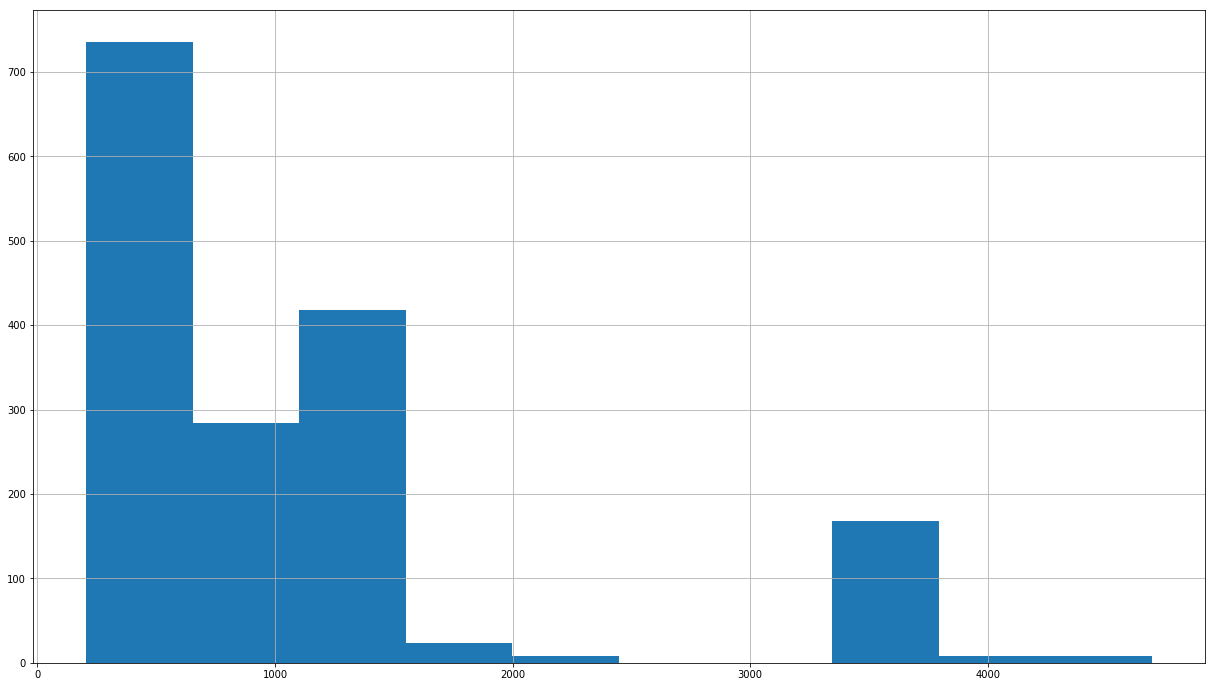

In [57]:
codec1.Frames.hist()

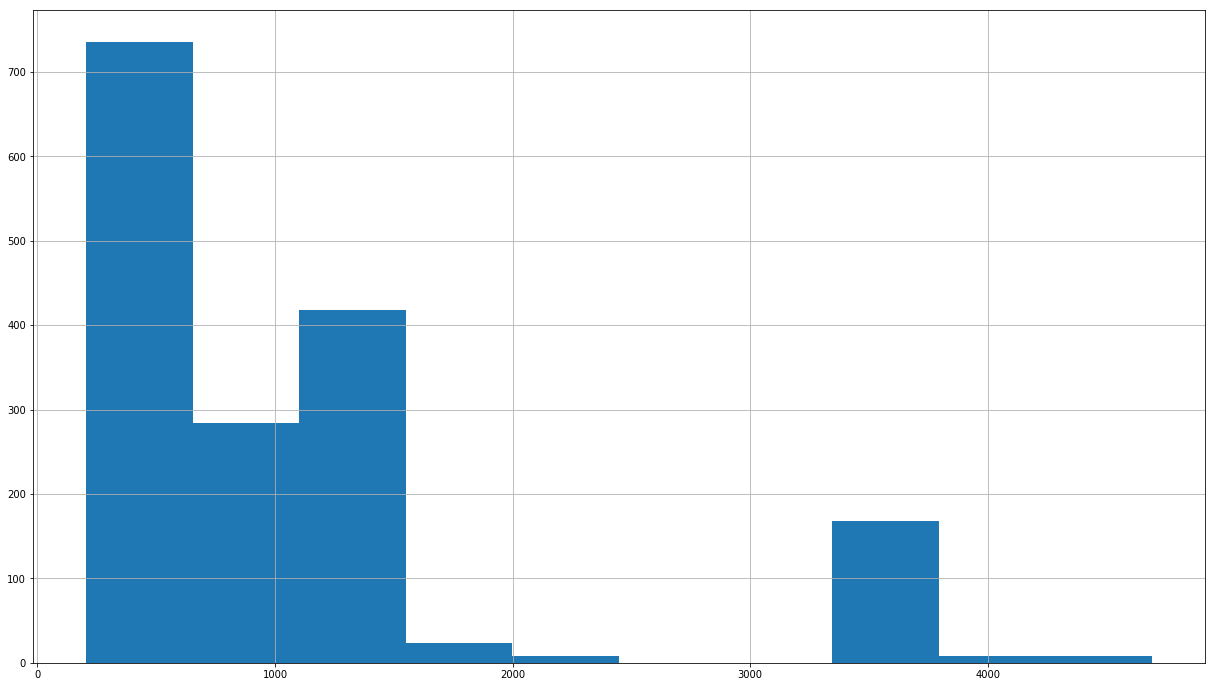

In [58]:
codec2.Frames.hist()

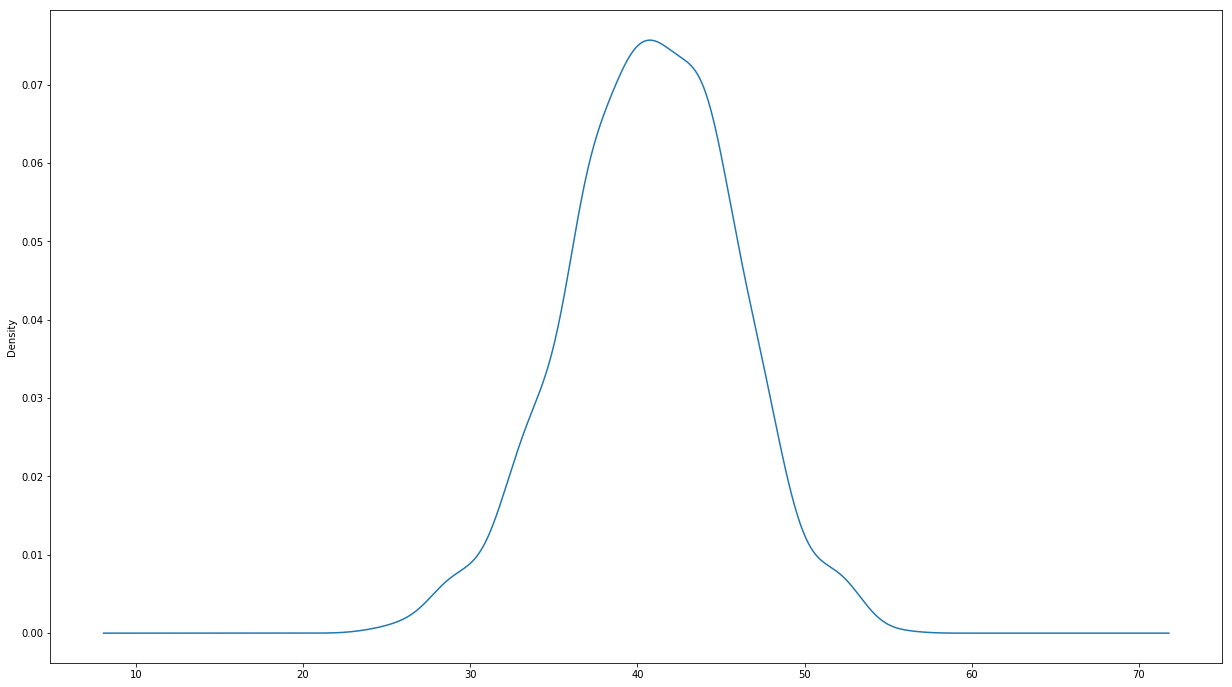

In [45]:
codec1['PSNR(YUV)'].plot.kde()

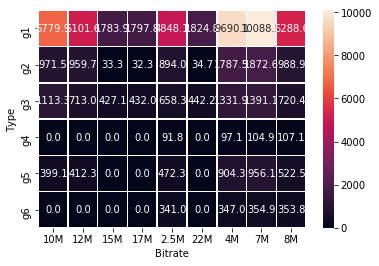

In [85]:
import seaborn as sns
platform_genre_sales = codec1.pivot_table(
                        index='Type', 
                        columns='Bitrate', 
                        values='PSNR(YUV)', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

In [151]:
diff = codec1_only_continuous - codec2_only_continuous
diff.groupby(['Type', 'Bitrate']).describe()

,Chroma,Frames,PSNR(Y),PSNR(U),PSNR(V),PSNR(YUV),"SSIM(Y,dB)","SSIM(U,dB)","SSIM(V,dB)","SSIM(YUV,dB)",Streams,FPS,GPU_Power,CPU_Power,System_Power,Encoded_Bitrate
count,1654.0,1654.0,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1650.000000,1654.000000
mean,0.0,0.0,-0.060273,0.146546,0.125719,0.066121,0.350942,0.603295,3.926088,0.487365,-6.249093,28.944680,5.080266,-1.923458,235.875988,0.045021
std,0.0,0.0,1.717510,1.975402,1.993944,1.844820,0.824761,0.824580,1.820184,0.821513,3.308806,23.277334,1.687544,4.311061,18.647407,0.239653
min,0.0,0.0,-7.709800,-2.790000,-2.890800,-3.869700,-2.966300,-1.168800,-1.882800,-2.372400,-8.000000,-39.750000,-4.420000,-13.960000,178.560000,-1.722200
25%,0.0,0.0,-0.718925,-0.554000,-0.548950,-0.622325,-0.171150,0.090150,2.758275,-0.042325,-8.000000,10.250000,4.110000,-4.430000,223.400000,0.012775
50%,0.0,0.0,-0.089600,0.049750,0.018450,0.013500,0.293900,0.572950,3.891300,0.472150,-8.000000,31.250000,5.140000,-2.100000,237.510000,0.088850
75%,0.0,0.0,0.502500,0.691850,0.626800,0.599950,0.893725,1.078925,5.076675,0.983950,-8.000000,40.250000,6.200000,-0.130000,247.400000,0.121650
max,0.0,0.0,31.335025,37.229948,38.119274,34.968896,10.958952,11.302964,14.870000,10.535455,0.000000,78.250000,9.560000,14.240000,294.080000,4.812900


We got missing values(inf) we need to get rid of. Lets plot the data

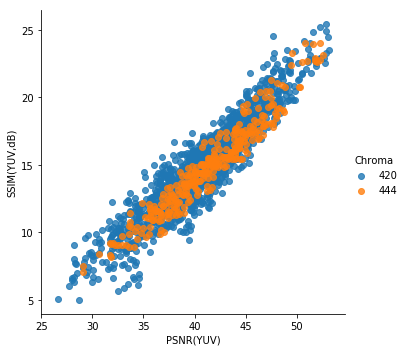

In [60]:
sns.lmplot('PSNR(YUV)', 'SSIM(YUV,dB)', data=outlierless_codec1, 
           hue='Chroma', fit_reg=False);

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 7))
for idx, feature in enumerate(metric_columns): 
    ax = axes[int(idx / 4), idx % 4] 
    sns.boxplot(x='Chroma', y=feature, data=df, ax=ax) 
    ax.set_xlabel('') 
    ax.set_ylabel(feat) 
fig.tight_layout();

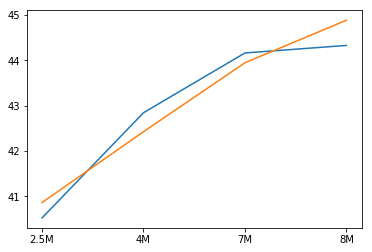

In [82]:
x1 = outlierless_codec1.loc[(outlierless_codec1['Type']=='g1') & (outlierless_codec1['Frame Size']=='720p') & (outlierless_codec1['Sample']=='s1')]
y1 = outlierless_codec1.loc[(outlierless_codec1['Type']=='g1') & (outlierless_codec1['Frame Size']=='720p') & (outlierless_codec1['Sample']=='s1')] 
x2 = outlierless_codec2.loc[(outlierless_codec2['Type']=='g1') & (outlierless_codec2['Frame Size']=='720p') & (outlierless_codec2['Sample']=='s1')]
y2 = outlierless_codec2.loc[(outlierless_codec2['Type']=='g1') & (outlierless_codec2['Frame Size']=='720p') & (outlierless_codec2['Sample']=='s1')] 
plt.plot(x1['Bitrate'], y1['PSNR(Y)'], label="codec1")
plt.plot(x2['Bitrate'], y2['PSNR(Y)'], label="codec2")
#plt.plot(outlierless_codec2['Bitrate'], outlierless_codec2['PSNR(Y)'], label = "Codec2")
#outlierless_codec1.loc[(outlierless_codec1['Type']=='g1') & (outlierless_codec1['Frame Size'].isin(opt))]

In [ ]:
def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

df.drop(df[df.Target == np.inf].index, inplace=True)
plotly_df(df)
df.head(10)